### Import Data from CSV

In [10]:
import pandas as pd
import os
import glob
  
  
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
all_data = pd.DataFrame()

for f in csv_files:
    df = pd.read_csv(f)
    all_data = pd.concat([all_data, df]) 

### Data Cleaning

In [11]:
# Only take matches that are Grand Slams (G)
all_data = all_data[all_data["tourney_level"] == "G"]

# Reset the Index
all_data.reset_index(inplace=True)

# Drop Unused Collumns
collumns_to_drop = [
    'tourney_id', 'tourney_date', 'index', 'draw_size', 'match_num', 
    'winner_id', 'winner_seed', 'winner_entry', 'winner_hand', 'winner_ht', 
    'winner_ioc', 'winner_age', 'loser_id', 'loser_name', 'loser_seed', 'loser_entry', 
    'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'w_SvGms',
    'l_SvGms', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'
    ]

all_data.drop(collumns_to_drop, axis=1, inplace=True)

# Drop Rows with Na as values
all_data.dropna(inplace=True)
all_data.head()

,tourney_name,surface,tourney_level,winner_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Roland Garros,Clay,G,Lleyton Hewitt,6-4 6-1 6-7(6) 6-3,5,R128,193.0,2.0,12.0,...,3.0,7.0,1.0,6.0,164.0,105.0,53.0,29.0,10.0,20.0
1,Roland Garros,Clay,G,Nikolay Davydenko,6-3 7-5 6-2,5,R128,116.0,1.0,1.0,...,4.0,5.0,5.0,3.0,86.0,48.0,31.0,17.0,7.0,12.0
2,Roland Garros,Clay,G,Jonas Bjorkman,6-1 6-2 6-4,5,R128,102.0,2.0,1.0,...,1.0,1.0,15.0,4.0,81.0,44.0,34.0,9.0,4.0,9.0
3,Roland Garros,Clay,G,Tommy Robredo,3-6 7-6(3) 3-6 3-1 RET,5,R128,163.0,5.0,4.0,...,10.0,16.0,3.0,8.0,128.0,74.0,48.0,27.0,9.0,14.0
4,Roland Garros,Clay,G,Gaston Gaudio,7-5 6-3 6-3,5,R128,131.0,6.0,4.0,...,4.0,5.0,1.0,2.0,92.0,43.0,34.0,21.0,4.0,9.0


### Organize Other Player Data

Remove the big three from the data, and set the data frame to `data_other`.

In [13]:
data_other = all_data[~all_data.winner_name.str.contains("Roger Federer")]
data_other = data_other[~data_other.winner_name.str.contains("Rafael Nadal")]
data_other = data_other[~data_other.winner_name.str.contains("Novak Djokovic")]
sum_other = data_other.sum()
data_other.head()

,tourney_name,surface,tourney_level,winner_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Roland Garros,Clay,G,Lleyton Hewitt,6-4 6-1 6-7(6) 6-3,5,R128,193.0,2.0,12.0,...,3.0,7.0,1.0,6.0,164.0,105.0,53.0,29.0,10.0,20.0
1,Roland Garros,Clay,G,Nikolay Davydenko,6-3 7-5 6-2,5,R128,116.0,1.0,1.0,...,4.0,5.0,5.0,3.0,86.0,48.0,31.0,17.0,7.0,12.0
2,Roland Garros,Clay,G,Jonas Bjorkman,6-1 6-2 6-4,5,R128,102.0,2.0,1.0,...,1.0,1.0,15.0,4.0,81.0,44.0,34.0,9.0,4.0,9.0
3,Roland Garros,Clay,G,Tommy Robredo,3-6 7-6(3) 3-6 3-1 RET,5,R128,163.0,5.0,4.0,...,10.0,16.0,3.0,8.0,128.0,74.0,48.0,27.0,9.0,14.0
4,Roland Garros,Clay,G,Gaston Gaudio,7-5 6-3 6-3,5,R128,131.0,6.0,4.0,...,4.0,5.0,1.0,2.0,92.0,43.0,34.0,21.0,4.0,9.0


### Organize Federer Data

In [14]:
data_federer = all_data[all_data['winner_name'] == "Roger Federer"]
sum_federer = data_federer.sum()
data_federer.head()

,tourney_name,surface,tourney_level,winner_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
143,Wimbledon,Grass,G,Roger Federer,6-3 6-3 7-6(2),5,R128,105.0,15.0,3.0,...,7.0,9.0,2.0,4.0,97.0,67.0,43.0,11.0,6.0,11.0
199,Wimbledon,Grass,G,Roger Federer,7-5 6-1 6-1,5,R64,77.0,6.0,3.0,...,2.0,3.0,0.0,3.0,75.0,45.0,20.0,15.0,5.0,12.0
227,Wimbledon,Grass,G,Roger Federer,6-3 6-1 4-6 6-1,5,R32,120.0,13.0,4.0,...,5.0,6.0,9.0,6.0,102.0,56.0,38.0,19.0,6.0,12.0
241,Wimbledon,Grass,G,Roger Federer,7-6(5) 6-4 6-4,5,R16,126.0,9.0,2.0,...,3.0,6.0,13.0,3.0,127.0,80.0,51.0,24.0,13.0,18.0
248,Wimbledon,Grass,G,Roger Federer,6-3 6-4 6-4,5,QF,98.0,13.0,5.0,...,3.0,4.0,1.0,2.0,102.0,74.0,45.0,12.0,7.0,11.0


### Organize Nadal Data

In [15]:
data_nadal = all_data[all_data['winner_name'] == "Rafael Nadal"]
sum_nadal = data_nadal.sum()
data_nadal.head()

,tourney_name,surface,tourney_level,winner_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
137,Wimbledon,Grass,G,Rafael Nadal,6-3 6-4 4-6 6-4,5,R128,184.0,2.0,0.0,...,11.0,14.0,15.0,6.0,134.0,73.0,58.0,20.0,11.0,16.0
196,Wimbledon,Grass,G,Rafael Nadal,6-2 6-4 6-3,5,R64,121.0,3.0,2.0,...,2.0,4.0,9.0,5.0,89.0,52.0,36.0,14.0,13.0,19.0
307,US Open,Hard,G,Rafael Nadal,6-4 6-3 6-3,5,R128,133.0,2.0,4.0,...,3.0,3.0,9.0,8.0,111.0,65.0,44.0,19.0,14.0,18.0
824,US Open,Hard,G,Rafael Nadal,6-0 6-3 4-6 2-6 6-3,5,R128,174.0,6.0,3.0,...,1.0,4.0,17.0,8.0,156.0,85.0,58.0,30.0,9.0,15.0
947,Australian Open,Hard,G,Rafael Nadal,6-1 6-2 6-2,5,R128,77.0,5.0,3.0,...,2.0,2.0,4.0,5.0,61.0,29.0,18.0,12.0,4.0,10.0


### Organize Djokovic Data

In [16]:
data_djoker = all_data[all_data['winner_name'] == "Novak Djokovic"]
sum_djoker = data_djoker.sum()
data_djoker.head()

,tourney_name,surface,tourney_level,winner_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
1049,Roland Garros,Clay,G,Novak Djokovic,6-0 6-0 6-3,5,R128,78.0,6.0,2.0,...,1.0,2.0,4.0,4.0,80.0,45.0,22.0,11.0,7.0,16.0
1196,Wimbledon,Grass,G,Novak Djokovic,6-3 7-6(5) 6-3,5,R128,113.0,2.0,5.0,...,2.0,3.0,4.0,5.0,97.0,63.0,44.0,18.0,7.0,10.0
1233,Wimbledon,Grass,G,Novak Djokovic,3-6 3-6 7-6(5) 7-6(3) 6-4,5,R64,248.0,8.0,4.0,...,9.0,18.0,6.0,5.0,182.0,108.0,76.0,33.0,10.0,17.0
1296,US Open,Hard,G,Novak Djokovic,7-5 4-6 7-6(5) 0-6 7-5,5,R128,237.0,3.0,5.0,...,12.0,16.0,22.0,5.0,147.0,78.0,67.0,39.0,1.0,3.0
1347,US Open,Hard,G,Novak Djokovic,6-3 5-7 7-6(4) 6-3,5,R64,207.0,6.0,4.0,...,3.0,7.0,8.0,3.0,133.0,88.0,64.0,20.0,8.0,13.0


In [17]:
data_federer = all_data[all_data['winner_name'] == "Roger Federer"]
data_federer.head()
data_federer.describe()
sum_federer = data_federer.sum()
sum_federer.head()

data_nadal = all_data[all_data['winner_name'] == "Rafael Nadal"]
data_nadal.head()
sum_nadal = data_nadal.sum()
sum_nadal.head()

data_djoker = all_data[all_data['winner_name'] == "Novak Djokovic"]
data_djoker.head()
sum_djoker = data_djoker.sum()
sum_djoker.head()

# Counting number of ace point played by every winning player
ace_winner = all_data[['winner_name', 'w_ace']].groupby('winner_name').sum()
ace_winner = pd.DataFrame(ace_winner)
ace_winner.sort_values('w_ace', ascending = False)
# Counting number of firstserve played by every winning player
firstserve_winner = all_data[['winner_name', 'w_1stWon']].groupby('winner_name').sum()
firstserve_winner = pd.DataFrame(firstserve_winner)
firstserve_winner.sort_values('w_1stWon', ascending = False)
# Counting number of secondserve played by every winning player
secondserve_winner = all_data[['winner_name', 'w_2ndWon']].groupby('winner_name').sum()
secondserve_winner = pd.DataFrame(secondserve_winner)
secondserve_winner.sort_values('w_2ndWon', ascending = False)
# Counting number of double faults by every player
df_winner = all_data[['winner_name', 'w_df']].groupby('winner_name').sum()
df_winner = pd.DataFrame(df_winner)
df_winner.head()


,w_df
winner_name,
Adam Pavlasek,10.0
Adrian Mannarino,95.0
Adrian Menendez Maceiras,1.0
Adrian Ungur,6.0
Adrian Voinea,3.0


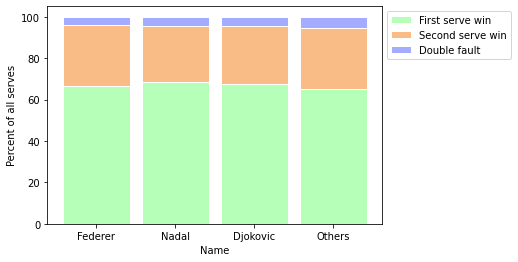

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3]
ff = sum_federer.w_1stWon + sum_federer.l_1stWon
fs = sum_federer.w_2ndWon + sum_federer.l_2ndWon
fd = sum_federer.w_df + sum_federer.l_df
nf = sum_nadal.w_1stWon + sum_nadal.l_1stWon
ns = sum_nadal.w_2ndWon + sum_nadal.l_2ndWon
nd = sum_nadal.w_df + sum_nadal.l_df
df = sum_djoker.w_1stWon + sum_djoker.l_1stWon
ds = sum_djoker.w_2ndWon + sum_djoker.l_2ndWon
dd = sum_djoker.w_df + sum_djoker.l_df
of = sum_other.w_1stWon + sum_other.l_1stWon
os = sum_other.w_2ndWon + sum_other.l_2ndWon
od = sum_other.w_df + sum_other.l_df

raw_data = {'greenBars': [ff, nf, df, of], 'orangeBars': [fs, ns, ds,os], 'blueBars': [fd, nd, dd, od]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
# plot
barWidth = 0.85
names = ('Federer','Nadal','Djokovic','Others')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="First serve win")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Second serve win")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Double fault")

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Name")
plt.ylabel("Percent of all serves")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

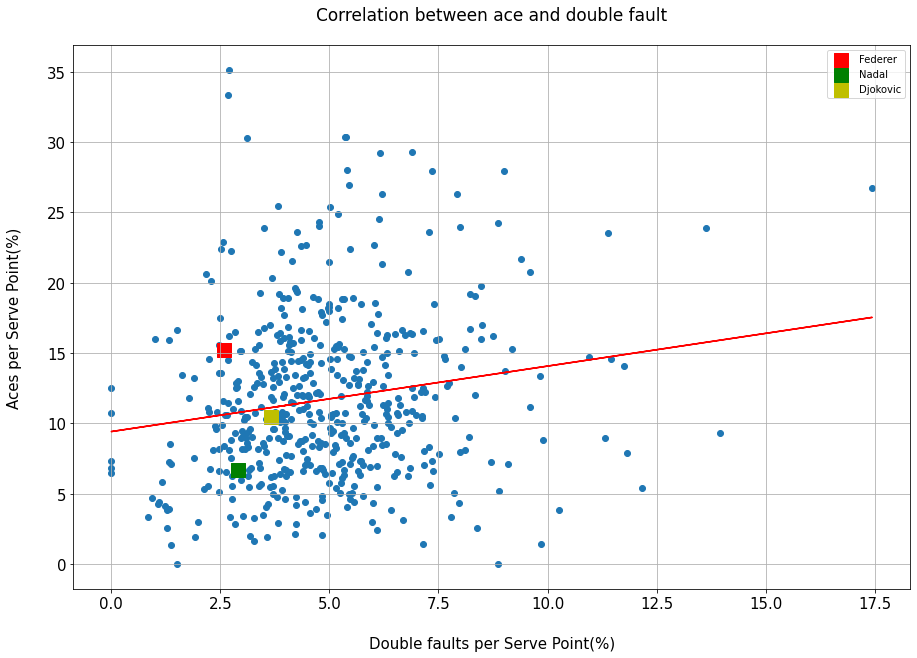

In [19]:
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between ace and double fault',fontsize=17, pad=25.0)
axis.set_xlabel('Double faults per Serve Point(%)',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Aces per Serve Point(%)',fontsize=15, labelpad=25.0)

A = (ace_winner['w_ace']).values.reshape(-1, 1)
D = (df_winner['w_df']).values.reshape(-1, 1)
x = firstserve_winner['w_1stWon'].values.reshape(-1, 1)
y = secondserve_winner['w_2ndWon'].values.reshape(-1, 1)
X = D/(x+y+D)*100
Y = A/(x+y+D)*100
fx = sum_federer.w_df/(sum_federer.w_1stWon+sum_federer.w_2ndWon+sum_federer.w_df)*100
fy = sum_federer.w_ace/(sum_federer.w_1stWon+sum_federer.w_2ndWon+sum_federer.w_df)*100
nx = sum_nadal.w_df/(sum_nadal.w_1stWon+sum_nadal.w_2ndWon+sum_nadal.w_df)*100
ny = sum_nadal.w_ace/(sum_nadal.w_1stWon+sum_nadal.w_2ndWon+sum_nadal.w_df)*100
dx = sum_djoker.w_df/(sum_djoker.w_1stWon+sum_djoker.w_2ndWon+sum_djoker.w_df)*100
dy = sum_djoker.w_ace/(sum_djoker.w_1stWon+sum_djoker.w_2ndWon+sum_djoker.w_df)*100

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor_one.predict(X)  # make predictions


plt.plot(X, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

axis.scatter(X, Y)
plt.scatter (fx,fy, s=200, marker = 's', color='r', label = 'Federer')
plt.scatter (nx, ny, s=200, marker = 's', color='g', label = 'Nadal')
plt.scatter (dx, dy, s=200, marker = 's', color='y', label = 'Djokovic')

plt.legend()